<a href="https://colab.research.google.com/github/dimakpa/ML_Projects/blob/main/MetricsTruePositiv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подгрузим библиотеки

In [5]:
from sklearn.datasets import load_breast_cancer
the_data = load_breast_cancer()

Разделим на ренировочный и тестовые выборкм

In [6]:
# 0 – "доброкачественный"
# 1 – "злокачественный"
relabeled_target = 1 - the_data["target"]

from sklearn.model_selection import train_test_split
X = the_data["data"]
y = relabeled_target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Обучим на классификаторе

In [7]:
from sklearn.dummy import DummyClassifier
dc_mf = DummyClassifier(strategy="most_frequent")
dc_mf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [8]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = dc_mf.predict(X_test)
dc_mf_tn, dc_mf_fp, dc_mf_fn, dc_mf_tp = confusion_matrix(y_true, y_pred, labels = [0, 1]).ravel()

In [9]:
print(f'TN={dc_mf_tn} FP={dc_mf_fp} FN={dc_mf_fn} TP={dc_mf_tp} ' )

TN=90 FP=0 FN=53 TP=0 


Обучающие данные таковы, что наш dummy-классификатор все объекты записывает в отрицательный класс, то есть признаёт все опухоли доброкачественными. Такой наивный подход позволяет нам получить минимальный штраф за FP (действительно, нельзя ошибиться в предсказании, если положительный класс вообще не предсказывается), но и максимальный штраф за FN (в эту группу попадут все злокачественные опухоли).

Теперь обучим модель случайного леса

In [10]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_true = y_test
y_pred = rfc.predict(X_test)
rfc_tn, rfc_fp, rfc_fn, rfc_tp = confusion_matrix(y_true, y_pred, labels = [0, 1]).ravel()

In [12]:
print(f'TN={rfc_tn} FP={rfc_fp} FN={rfc_fn} TP={rfc_tp} ', )

TN=87 FP=3 FN=1 TP=52 


Можно сказать, что этот классификатор чему-то научился, т.к. главная диагональ матрицы стала содержать все объекты из отложенной выборки, за исключением 4 + 1 = 5 объектов

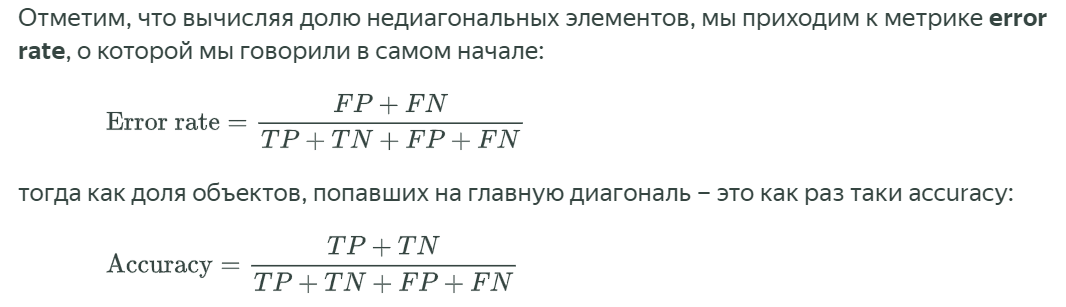

Построим еще один классификатор на основе линейного метода опорных векторов.

In [14]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
scaled_linsvc = LinearSVC(C=0.01,random_state=42)
scaled_linsvc.fit(ss.transform(X_train), y_train)
y_true = y_test
y_pred = scaled_linsvc.predict(ss.transform(X_test))
tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels = [0, 1]).ravel()

In [16]:
print(f'TN={tn} FP={fp} FN={fn} TP={tp} ', )

TN=89 FP=1 FN=3 TP=50 


 На матрицах нет отношения порядка. Когда мы сравнивали dummy-классификатор и случайный лес с помощью Accuracy, мы всю сложную структуру ошибок свели к одному числу, т.к. на вещественных числах отношение порядка есть. Сводить оценку модели к одному числу очень удобно, однако не стоит забывать, что у вашей модели есть много аспектов качества.

В текущем виде введенная нами доля ошибочных классификаций не даст нам возможности учесть неравную важность FP и FN. Поэтому введем две новые метрики: точность и полноту.

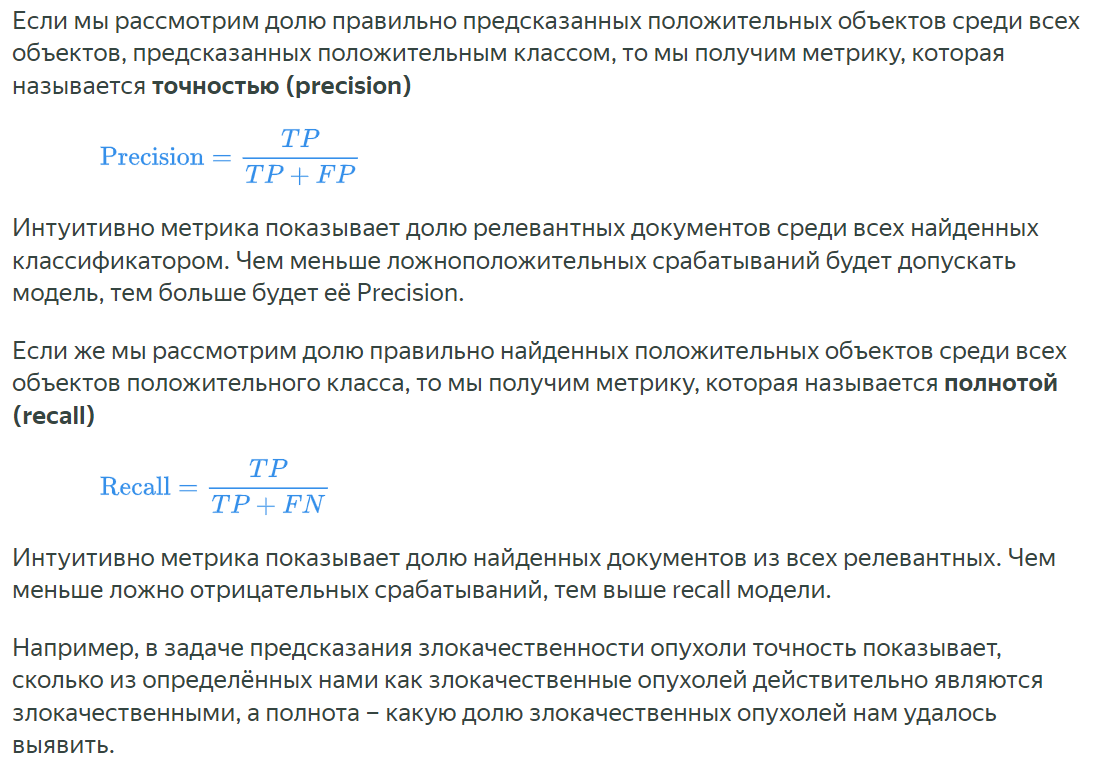

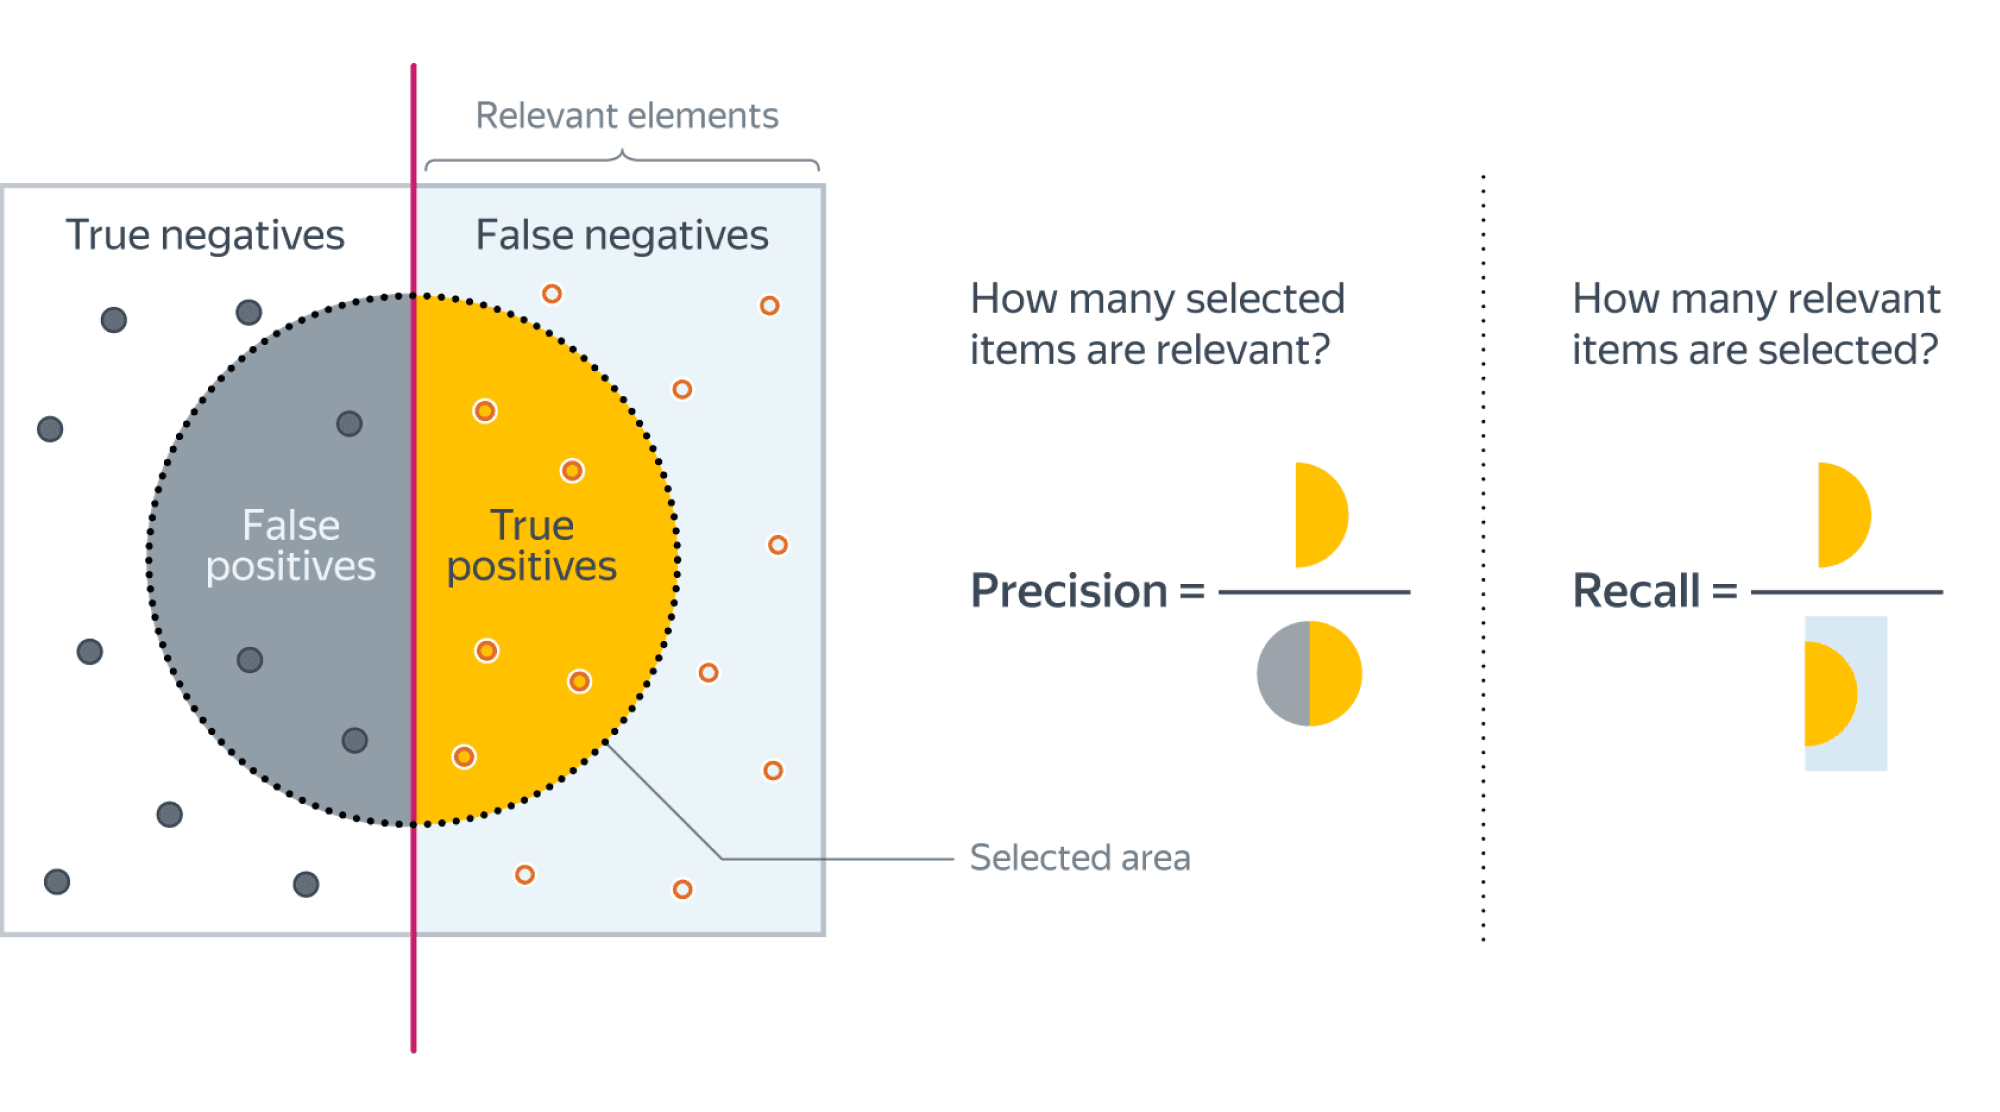

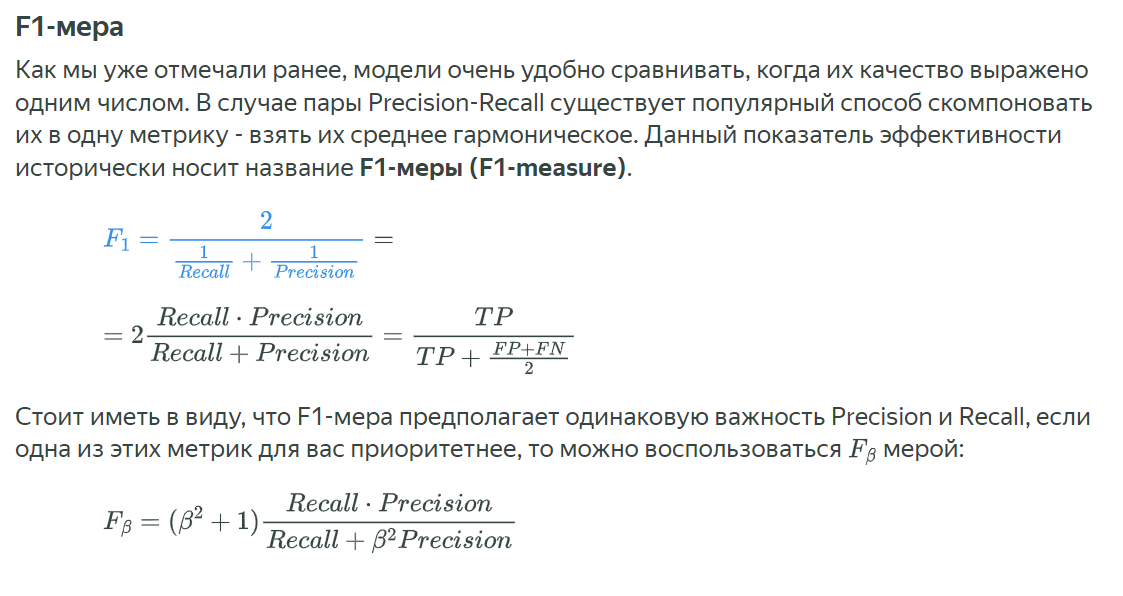

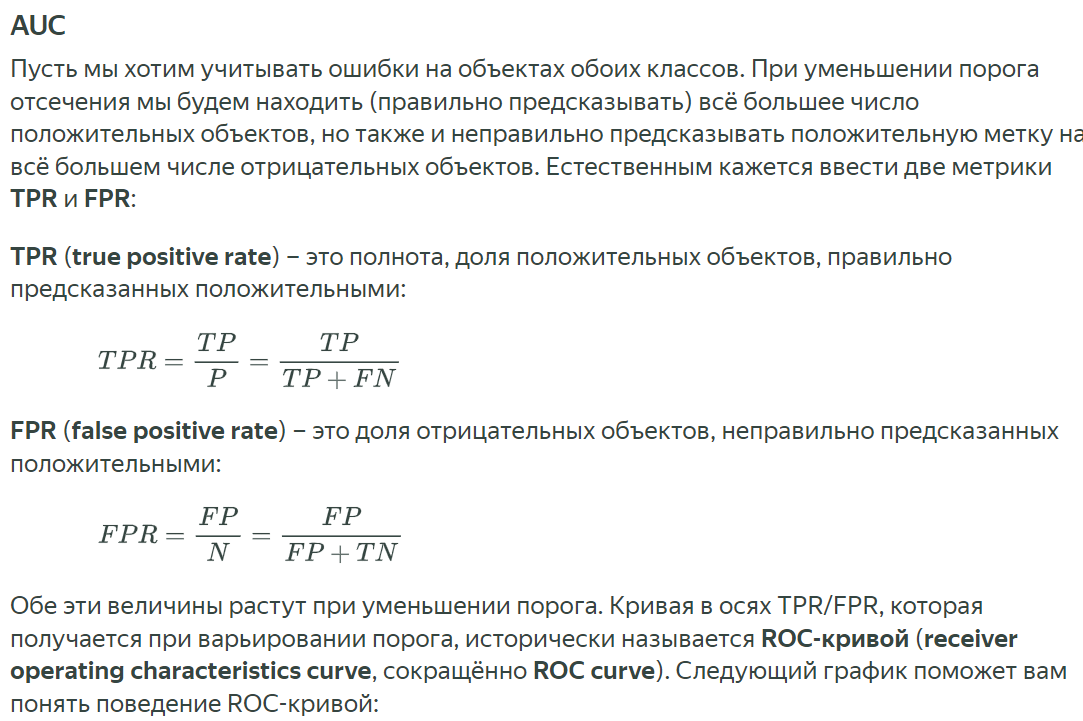

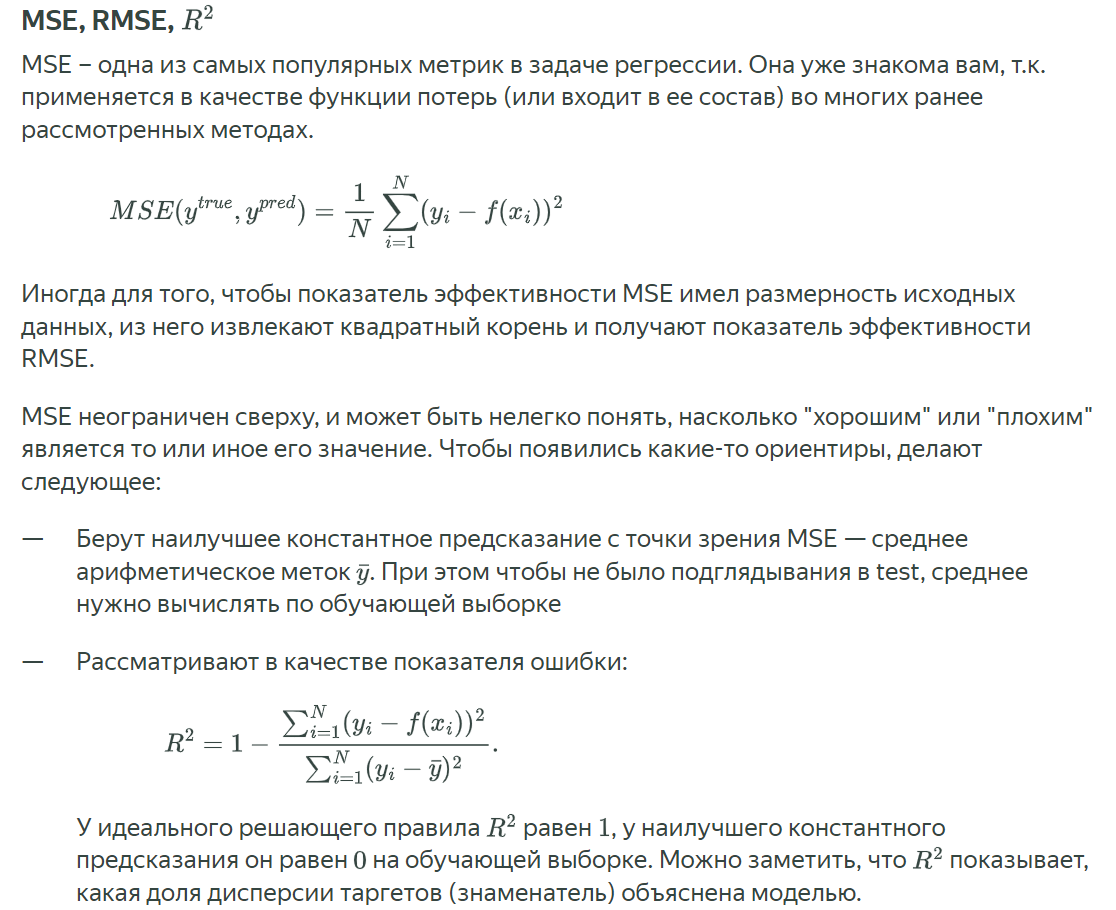

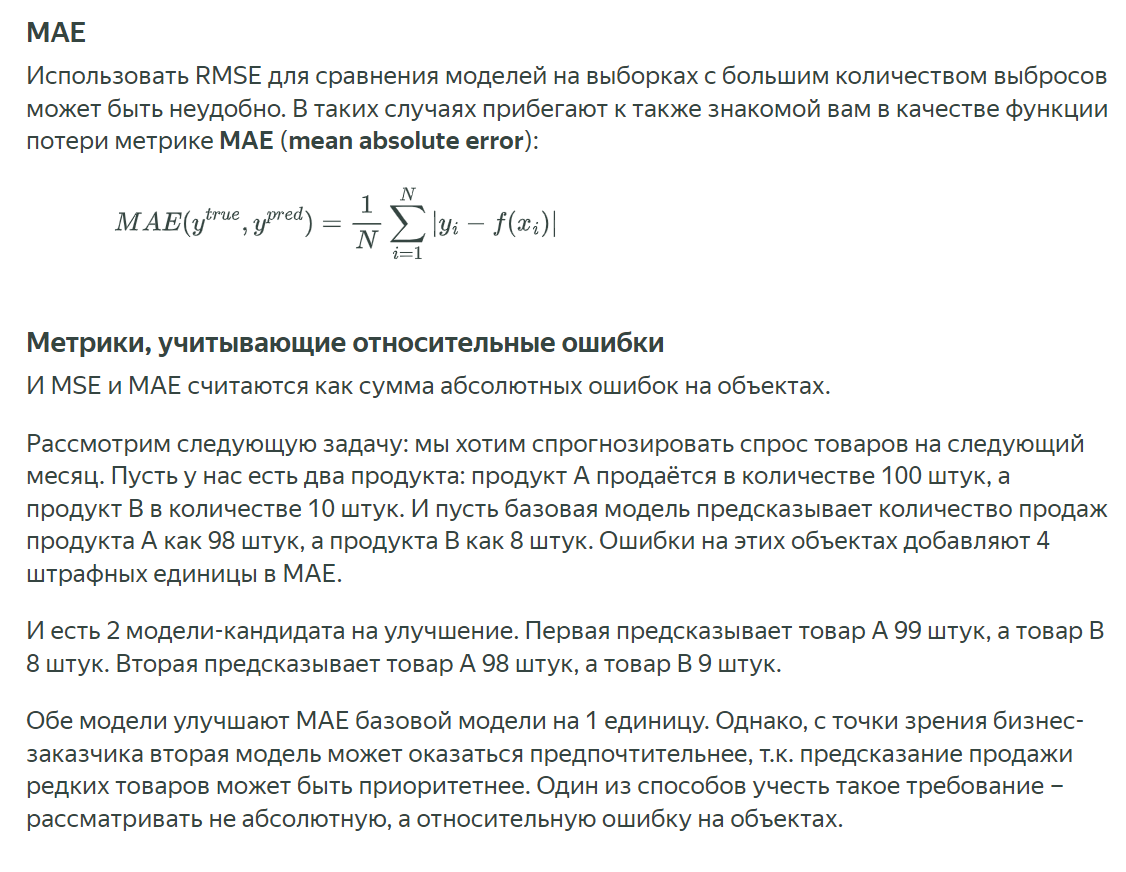

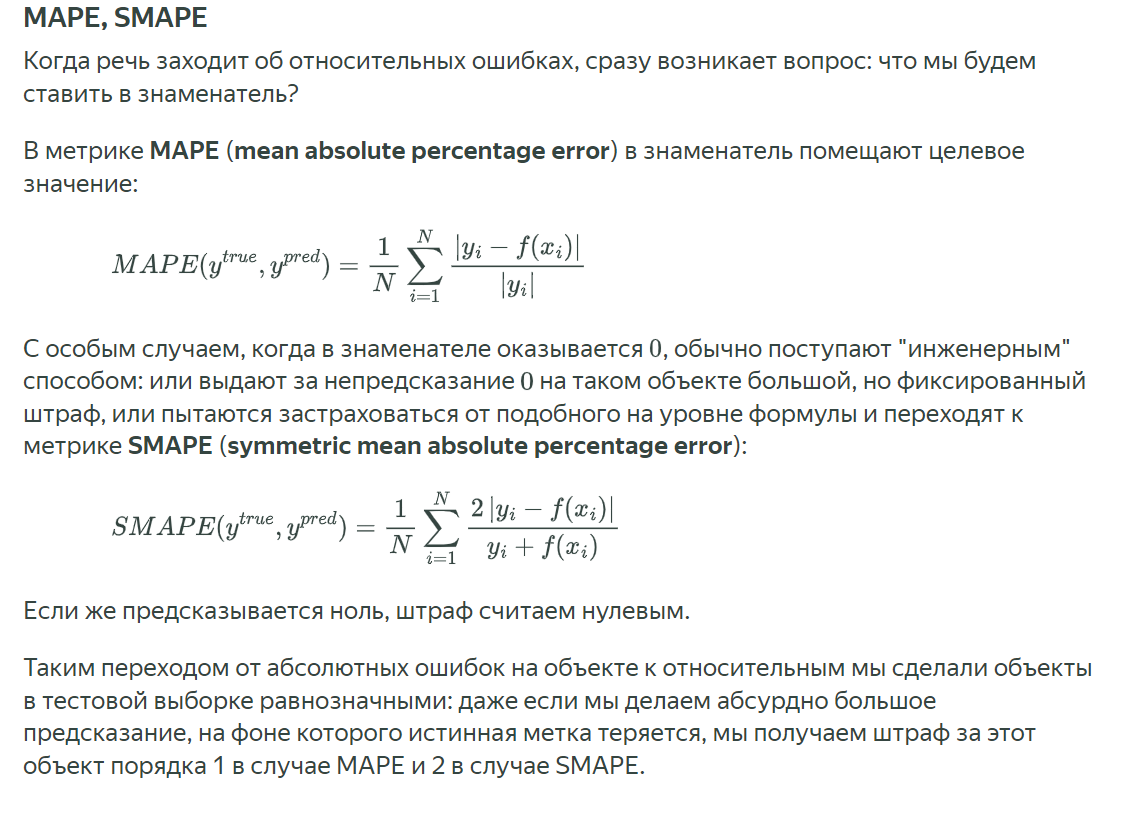

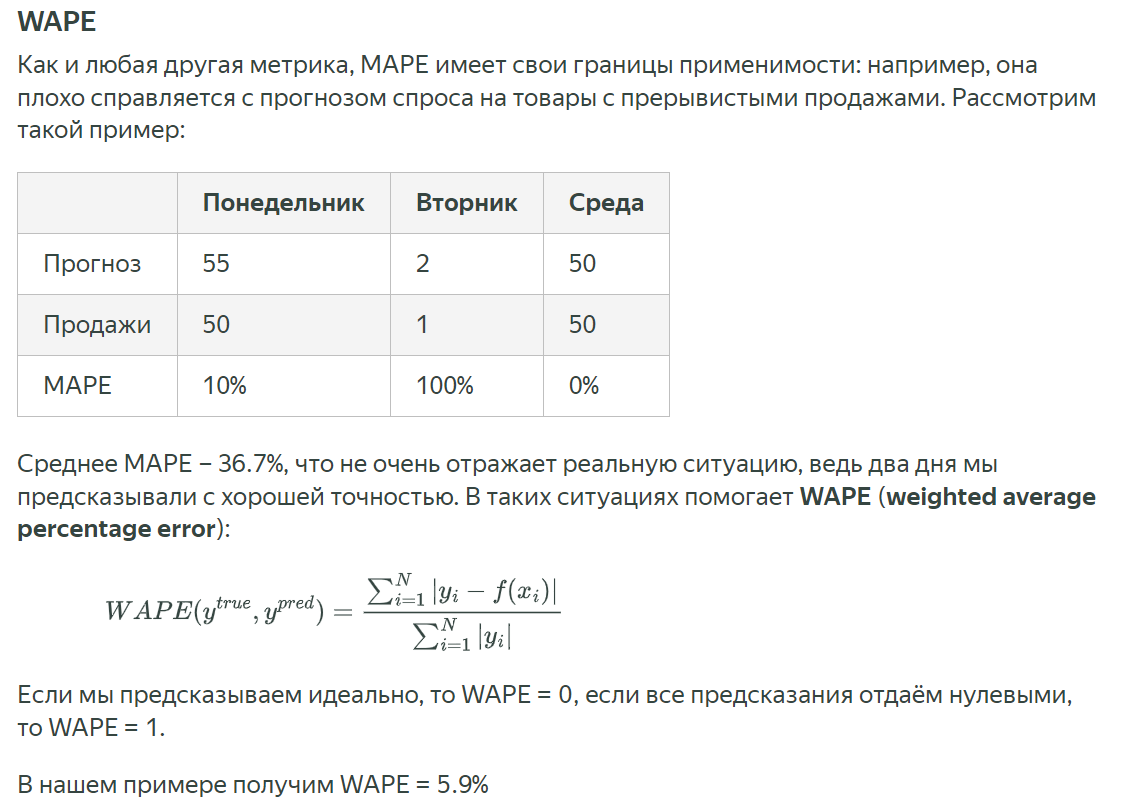

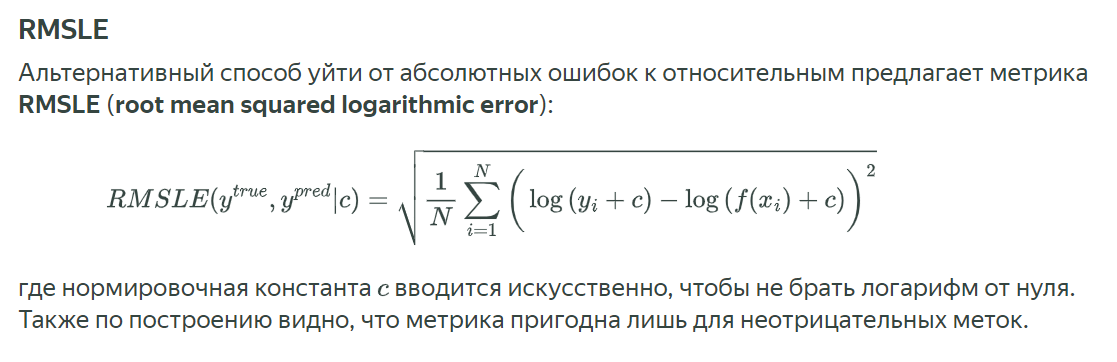

Все вышеописанные метрики легко допускают введение весов для объектов. Если мы из каких-то соображений можем определить стоимость ошибки на объекте, можно брать эту величину в качестве веса. Например, в задаче предсказания спроса в качестве веса можно использовать стоимость объекта.

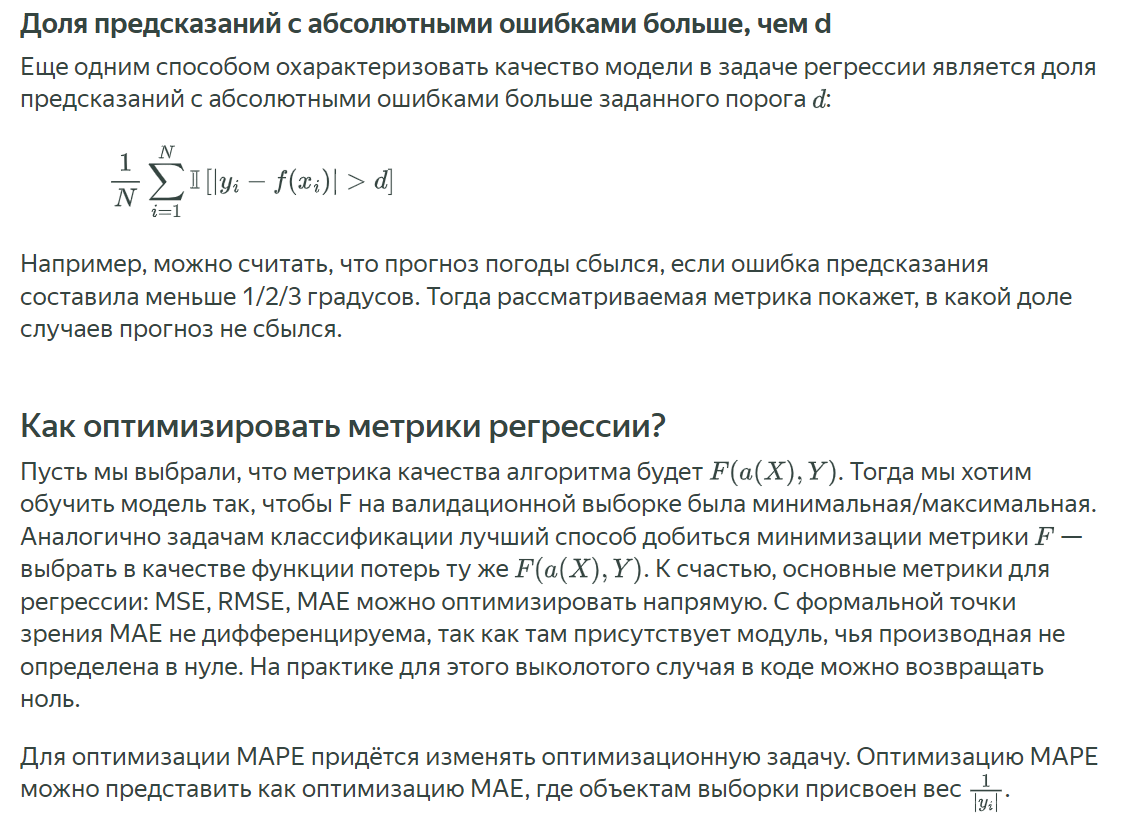